In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phonereviews/data.csv


In [2]:
data = pd.read_csv('/kaggle/input/phonereviews/data.csv')

In [3]:
data

,Review,Rating
0,3D Touch просто восхитительная вещь! Заряд дер...,5
1,"Отключается при температуре близкой к нулю, не...",4
2,"В Apple окончательно решили не заморачиваться,...",3
3,Постарался наиболее ёмко и коротко описать все...,4
4,Достойный телефон. Пользоваться одно удовольст...,5
...,...,...
458428,"удобный, всё работает отлично, звонит, играет,...",5
458429,"прошло больше года, притензий нет, при моей на...",5
458430,мой первый аппарат на андроиде. На данный моме...,5
458431,Разбил iphone и не было желания покупать новый...,5


In [4]:
data = data.dropna()
data

,Review,Rating
0,3D Touch просто восхитительная вещь! Заряд дер...,5
1,"Отключается при температуре близкой к нулю, не...",4
2,"В Apple окончательно решили не заморачиваться,...",3
3,Постарался наиболее ёмко и коротко описать все...,4
4,Достойный телефон. Пользоваться одно удовольст...,5
...,...,...
458428,"удобный, всё работает отлично, звонит, играет,...",5
458429,"прошло больше года, притензий нет, при моей на...",5
458430,мой первый аппарат на андроиде. На данный моме...,5
458431,Разбил iphone и не было желания покупать новый...,5


<AxesSubplot:>

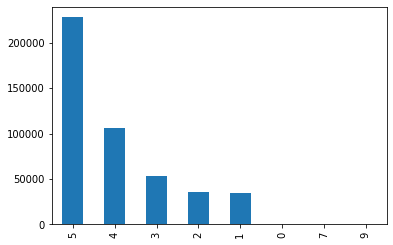

In [8]:
ratings_distr = data['Rating'].value_counts()
ratings_distr.plot(kind='bar')

In [9]:
data_filtered = data.loc[data['Rating'].isin({1, 2, 4, 5})]
data_filtered

,Review,Rating
0,3D Touch просто восхитительная вещь! Заряд дер...,5
1,"Отключается при температуре близкой к нулю, не...",4
3,Постарался наиболее ёмко и коротко описать все...,4
4,Достойный телефон. Пользоваться одно удовольст...,5
5,6s gold 64gb,5
...,...,...
458428,"удобный, всё работает отлично, звонит, играет,...",5
458429,"прошло больше года, притензий нет, при моей на...",5
458430,мой первый аппарат на андроиде. На данный моме...,5
458431,Разбил iphone и не было желания покупать новый...,5


In [12]:
df = data_filtered
df = df.reset_index(drop=True)
df.loc[(df['Rating'] >= 4), 'Sentiment'] = 'positive'
df.loc[(df['Rating'] <= 2), 'Sentiment'] = 'negative'
df['Sentiment'].value_counts()

positive    334589
negative     70189
Name: Sentiment, dtype: int64

In [13]:
df = df.loc[df.apply(lambda row: len(row['Review']) >= 20, axis=1)]
df['Sentiment'].value_counts()

positive    326183
negative     67920
Name: Sentiment, dtype: int64

In [15]:
texts = df['Review'].values
print(type(df['Review']), type(df['Review'].values))
texts[:3]

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


array(['3D Touch просто восхитительная вещь! Заряд держит целый день. В розовом цвете смотрится очень необычно. Touch ID очень быстрый и удобный. Всем советую этот телефон!',
       'Отключается при температуре близкой к нулю, непонятно ведет себя батарея',
       'Постарался наиболее ёмко и коротко описать все основные плюсы и минусы. Большим мне аппарат не показался, размеры - что надо. Внешний вид, как для меня, так 5-ка выглядит интереснее и солиднее.'],
      dtype=object)

In [16]:
labels = df['Sentiment'].values
labels[:3]

array(['positive', 'positive', 'positive'], dtype=object)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    texts,
    labels,
    test_size=0.1,
    random_state=1,
)
X_train[:3], y_train[:3]

(array(['За такие деньги это хороший телефон',
        'Купил недавно, но не могу нарадоваться! Раньше была Sony Xperia neo - очень плохо ловила wi-fi, да и вообще морально устарела. Выбирал себе новый телефон, наверное, полгода - очень много вариантов пересмотрел, раз по 10 каждый отвергал и потом заново рассматривал:). В итоге остановился на E975 и, что для меня редкость, ни капельки не пожалел! Т. е. вообще нет ничего, что раздражает или не нравится - сплошная гора позитивных эмоций! Я влюблён в этот телефон и боюсь только случайно его уронить (стеклянный, всё же).PS Носите без чехла (я хочу купить "кармашек", чтобы когда достаю телефон - в руках без всяких нагромождений было)! В руках держать очень приятно!P. S. Не понравилась только базовая клавиатура на кириллице, но она за 30 секунд меняется на нормальную от гугла, например:)P. P. S. UPD от 14.03.2016: Телефон всё ещё как новенький и я всё так же в него влюблён:)',
        'Отличный телефон, nokia рулит, сколько пользуюсь стольк

In [18]:
print(f'len(X_train) = {len(X_train)}')
print(f'len(y_train) = {len(y_train)}')
print(f'len(X_test) = {len(X_test)}')
print(f'len(y_test) = {len(y_test)}')

len(X_train) = 354692
len(y_train) = 354692
len(X_test) = 39411
len(y_test) = 39411


In [20]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer(max_features=20_000)
X_train_bow = c_vect.fit_transform(X_train)
X_train_bow[:3], X_train_bow.shape

CPU times: user 21.7 s, sys: 442 ms, total: 22.1 s
Wall time: 22.1 s


(<3x20000 sparse matrix of type '<class 'numpy.int64'>'
 	with 110 stored elements in Compressed Sparse Row format>,
 (354692, 20000))

In [21]:
%%time
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(X_train_bow, y_train)

CPU times: user 42.8 s, sys: 35.8 s, total: 1min 18s
Wall time: 21.6 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [22]:
examples = [
    'Отличный телефон - сколько пользуюсь, столько и радуюсь',
    'Ужасный телефон, хуже некуда!',
    'Сегодня отличная погода!',
    'У Васи ужасное настроение.',
]
examples = c_vect.transform(examples)
print(logreg.predict(examples)) 
print(logreg.predict_proba(examples))

['positive' 'negative' 'positive' 'negative']
[[0.00591167 0.99408833]
 [0.96951153 0.03048847]
 [0.0187495  0.9812505 ]
 [0.63721625 0.36278375]]


In [24]:
X_test_bow = c_vect.transform(X_test)
X_test_bow[:3], X_test_bow.shape

(<3x20000 sparse matrix of type '<class 'numpy.int64'>'
 	with 252 stored elements in Compressed Sparse Row format>,
 (39411, 20000))

In [26]:
from sklearn.metrics import classification_report

predicted = logreg.predict(X_test_bow)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.82      0.69      0.75      6742
    positive       0.94      0.97      0.95     32669

    accuracy                           0.92     39411
   macro avg       0.88      0.83      0.85     39411
weighted avg       0.92      0.92      0.92     39411



In [27]:
%%time
c_vect2 = CountVectorizer(max_features=30_000, ngram_range=(1, 3))
X_train_bow2 = c_vect2.fit_transform(X_train)
X_test_bow2 = c_vect2.transform(X_test)

CPU times: user 2min 42s, sys: 6.62 s, total: 2min 49s
Wall time: 2min 48s


In [28]:
logreg2 = LogisticRegression(random_state=1)
logreg2.fit(X_train_bow2, y_train)
predicted = logreg2.predict(X_test_bow2)
print(classification_report(y_test, predicted))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    negative       0.87      0.78      0.83      6742
    positive       0.96      0.98      0.97     32669

    accuracy                           0.94     39411
   macro avg       0.91      0.88      0.90     39411
weighted avg       0.94      0.94      0.94     39411

